In [65]:
import pandas as pd
import numpy as np
import sklearn
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log,sqrt
%matplotlib inline

**READ DATA**

In [66]:
mails=pd.read_csv("C:/Users/user/Desktop/Python datsets/spam.csv",encoding='latin-1')
mails.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**REMOVE COLUMNS 'Unnamed:2','Unnamed:3','Unnames:4'**

In [67]:

mails.drop(mails.columns[[2,3,4]], axis=1, inplace=True)

In [68]:
mails.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**rename the column ‘v1’ as ‘label’ and ‘v2’ as ‘message’**

In [69]:
mails= mails.rename(columns={'v1': 'label', 'v2': 'message'})

In [70]:
mails.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Replace 'ham' by '0' and 'spam' by '1'**

In [71]:
label = {'ham':0,'spam':1} 
mails.label = [label[item] for item in mails.label] 


In [72]:
mails.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


**Train-Test Split**

In [73]:
totalMails=mails['message'].shape[0]
trainIndex,testIndex=list(),list()
for i in range(mails.shape[0]):
    if np.random.uniform(0,1)<0.75:
        trainIndex += [i]
    else:
        testIndex += [i]
trainData=mails.loc[trainIndex] 
testData=mails.loc[testIndex]

In [74]:
trainData.reset_index(inplace=True)
trainData.drop(['index'],axis=1,inplace=True)
trainData.head()

,label,message
0,1,Free entry in 2 a wkly comp to win FA Cup fina...
1,0,U dun say so early hor... U c already then say...
2,0,"Nah I don't think he goes to usf, he lives aro..."
3,1,FreeMsg Hey there darling it's been 3 week's n...
4,0,Even my brother is not like to speak with me. ...


In [75]:
testData.reset_index(inplace = True)
testData.drop(['index'], axis = 1, inplace = True)
testData.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,0,As per your request 'Melle Melle (Oru Minnamin...
3,1,URGENT! You have won a 1 week FREE membership ...
4,0,I've been searching for the right words to tha...


In [76]:
trainData['label'].value_counts()

0    3610
1     558
Name: label, dtype: int64

In [77]:
trainData['label'].value_counts()

0    3610
1     558
Name: label, dtype: int64

**WordCloud:Visualizing most repeated words**

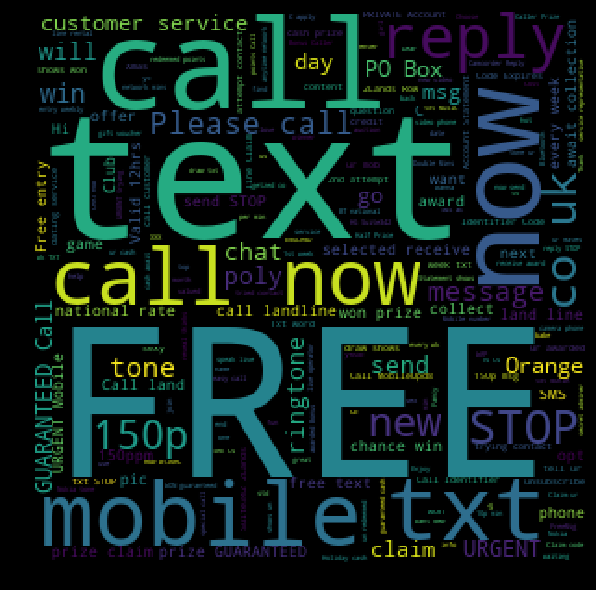

In [78]:
spam_words=' '.join(list(mails[mails['label']==1]['message']))
spam_wc=WordCloud(width=300,height=300).generate(spam_words)
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

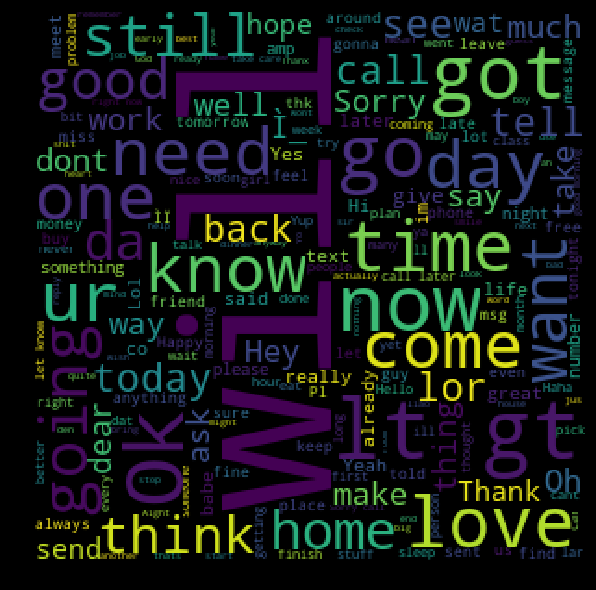

In [79]:
ham_words=' '.join(list(mails[mails['label']==0]['message']))
ham_wc=WordCloud(width=300,height=300).generate(ham_words)
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(ham_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [80]:
trainData.head()

,label,message
0,1,Free entry in 2 a wkly comp to win FA Cup fina...
1,0,U dun say so early hor... U c already then say...
2,0,"Nah I don't think he goes to usf, he lives aro..."
3,1,FreeMsg Hey there darling it's been 3 week's n...
4,0,Even my brother is not like to speak with me. ...


In [81]:
trainData['label'].value_counts()

0    3610
1     558
Name: label, dtype: int64

In [83]:
testData.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,0,As per your request 'Melle Melle (Oru Minnamin...
3,1,URGENT! You have won a 1 week FREE membership ...
4,0,I've been searching for the right words to tha...


In [82]:
testData['label'].value_counts()

0    1215
1     189
Name: label, dtype: int64

# Preprocessing#

**make all the character lowercase**




**tokenize each message**

**perform stemming**

**using n-grams for improving accuracy.**

In [84]:
def process_message(message,lower_case=True,stem=True,stop_words=True,gram=2):
    if lower_case:
        message=message.lower()
    words=word_tokenize(message)
    words=[w for w in words if len(w)>2]
    if gram > 1:
        w=[ ]
        for i in range(len(words) - gram + 1):
            w += [' '.join(words[i:i + gram])]
        return w
    if stop_words:
        sw=stopwords.words('english')
        words = [word for word in words if word not in sw]
    if stem:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]
    return words    

In [85]:
class SpamClassifier(object):
    def __init__(self, trainData, method = 'tf-idf'):
        self.mails, self.labels = trainData['message'], trainData['label']
        self.method = method

    def train(self):
        self.calc_TF_and_IDF()
        if self.method == 'tf-idf':
            self.calc_TF_IDF()
        else:
            self.calc_prob()

    def calc_prob(self):
        self.prob_spam = dict()
        self.prob_ham = dict()
        for word in self.tf_spam:
            self.prob_spam[word] = (self.tf_spam[word] + 1) / (self.spam_words + \
                                                                len(list(self.tf_spam.keys())))
        for word in self.tf_ham:
            self.prob_ham[word] = (self.tf_ham[word] + 1) / (self.ham_words + \
                                                                len(list(self.tf_ham.keys())))
        self.prob_spam_mail, self.prob_ham_mail = self.spam_mails / self.total_mails, self.ham_mails / self.total_mails 


    def calc_TF_and_IDF(self):
        noOfMessages = self.mails.shape[0]
        self.spam_mails, self.ham_mails = self.labels.value_counts()[1], self.labels.value_counts()[0]
        self.total_mails = self.spam_mails + self.ham_mails
        self.spam_words = 0
        self.ham_words = 0
        self.tf_spam = dict()
        self.tf_ham = dict()
        self.idf_spam = dict()
        self.idf_ham = dict()
        for i in range(noOfMessages):
            message_processed = process_message(self.mails[i])
            count = list() #To keep track of whether the word has ocured in the message or not.
                           #For IDF
            for word in message_processed:
                if self.labels[i]:
                    self.tf_spam[word] = self.tf_spam.get(word, 0) + 1
                    self.spam_words += 1
                else:
                    self.tf_ham[word] = self.tf_ham.get(word, 0) + 1
                    self.ham_words += 1
                if word not in count:
                    count += [word]
            for word in count:
                if self.labels[i]:
                    self.idf_spam[word] = self.idf_spam.get(word, 0) + 1
                else:
                    self.idf_ham[word] = self.idf_ham.get(word, 0) + 1

    def calc_TF_IDF(self):
        self.prob_spam = dict()
        self.prob_ham = dict()
        self.sum_tf_idf_spam = 0
        self.sum_tf_idf_ham = 0
        for word in self.tf_spam:
            self.prob_spam[word] = (self.tf_spam[word]) * log((self.spam_mails + self.ham_mails) \
                                                          / (self.idf_spam[word] + self.idf_ham.get(word, 0)))
            self.sum_tf_idf_spam += self.prob_spam[word]
        for word in self.tf_spam:
            self.prob_spam[word] = (self.prob_spam[word] + 1) / (self.sum_tf_idf_spam + len(list(self.prob_spam.keys())))
            
        for word in self.tf_ham:
            self.prob_ham[word] = (self.tf_ham[word]) * log((self.spam_mails + self.ham_mails) \
                                                          / (self.idf_spam.get(word, 0) + self.idf_ham[word]))
            self.sum_tf_idf_ham += self.prob_ham[word]
        for word in self.tf_ham:
            self.prob_ham[word] = (self.prob_ham[word] + 1) / (self.sum_tf_idf_ham + len(list(self.prob_ham.keys())))
            
    
        self.prob_spam_mail, self.prob_ham_mail = self.spam_mails / self.total_mails, self.ham_mails / self.total_mails 
                    
    def classify(self, processed_message):
        pSpam, pHam = 0, 0
        for word in processed_message:                
            if word in self.prob_spam:
                pSpam += log(self.prob_spam[word])
            else:
                if self.method == 'tf-idf':
                    pSpam -= log(self.sum_tf_idf_spam + len(list(self.prob_spam.keys())))
                else:
                    pSpam -= log(self.spam_words + len(list(self.prob_spam.keys())))
            if word in self.prob_ham:
                pHam += log(self.prob_ham[word])
            else:
                if self.method == 'tf-idf':
                    pHam -= log(self.sum_tf_idf_ham + len(list(self.prob_ham.keys()))) 
                else:
                    pHam -= log(self.ham_words + len(list(self.prob_ham.keys())))
            pSpam += log(self.prob_spam_mail)
            pHam += log(self.prob_ham_mail)
        return pSpam >= pHam
    
    def predict(self, testData):
        result = dict()
        for (i, message) in enumerate(testData):
            processed_message = process_message(message)
            result[i] = int(self.classify(processed_message))
        return result

In [87]:
def metrics(labels, predictions):
    true_pos, true_neg, false_pos, false_neg = 0, 0, 0, 0
    for i in range(len(labels)):
        true_pos += int(labels[i] == 1 and predictions[i] == 1)
        true_neg += int(labels[i] == 0 and predictions[i] == 0)
        false_pos += int(labels[i] == 0 and predictions[i] == 1)
        false_neg += int(labels[i] == 1 and predictions[i] == 0)
    precision = true_pos / (true_pos + false_pos)
    recall = true_pos / (true_pos + false_neg)
    Fscore = 2 * precision * recall / (precision + recall)
    accuracy = (true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg)

    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F-score: ", Fscore)
    print("Accuracy: ", accuracy)

In [86]:
sc_tf_idf = SpamClassifier(trainData, 'tf-idf')
sc_tf_idf.train()
preds_tf_idf = sc_tf_idf.predict(testData['message'])
metrics(testData['label'], preds_tf_idf)

Precision:  0.8888888888888888
Recall:  0.7195767195767195
F-score:  0.7953216374269005
Accuracy:  0.9501424501424501


In [88]:
sc_bow = SpamClassifier(trainData, 'bow')
sc_bow.train()
preds_bow = sc_bow.predict(testData['message'])
metrics(testData['label'], preds_bow)

Precision:  0.8852459016393442
Recall:  0.5714285714285714
F-score:  0.6945337620578779
Accuracy:  0.9323361823361823


In [89]:
pm = process_message('I call you later, dont have network. If urgnt, sms me.')
sc_tf_idf.classify(pm)

False

In [90]:
pm = process_message('Congratulations ur awarded 500 of CD vouchers or 125gift guaranteed & Free entry 2 100 wkly draw txt MUSIC to 87066 TnCs www.Ldew.com1win150ppmx3age16')
sc_tf_idf.classify(pm)

True